# Math 300: Recitation 2

Today we will be going through some examples of the bisection method to find roots of continuous functions and fixed point iteration (to find fixed points of a function). In homework 1, you are doing this "by-hand", but it is very useful to be able to check your work in Julia.

## Necessary Packages

In [28]:
using Printf # printf allows us to print out statements with variables in a convienient format.
using Plots # allows us to plot things.
using LaTeXStrings # allows LaTex strings to be outputted by julia. Kinda optional, but it looks nice.

## Root Finding: Bisection Method

We will begin by coding up a function that will perform the bisection method on a function $f(x)$ in order to find the roots of the function, i.e the $x$ values that satisfy $f(x) = 0$, on a given interval $x \in [a,b]$. It is important to note that in order to use this method, $f(x)$ must satisfy some conditions:

1) $f(x)$ must be continuous on $[a,b]$
2) $f(a) * f(b) \leq 0$, i.e $f$ must change sign somewhere in the interval.

Now we will code up a function that performs the bisection method on any function we wish to input. This function will be based on Algorithm 2.1 on pg. 49 of Burden:

In [30]:
function bisect_method(f, a, b, tol, N)
    done = false; # changing this to false in the function will mean we have reached a stopping criteria
    i = 1;
    p = 0;
    while (done == false) && (i <= N) # "if no stopping criteria yet and we havent gone over max iterations..."
        FA = f(a)
        p = (a + b)/2 # bisection point
        FP = f(p)
        b_old = b # this will help with outputing the error for this iteration
        a_old = a # this will help with outputing the error for this iteration
        if FA * FP < 0.0 # see if sign changed in first half of interval
            a = a
            b = p
        elseif FA * FP > 0.0 # see if sign changed in second half of interval
            a = p 
            b = b
        else # FA * FP = 0, so this means we found the root exactly.
            @printf("Iteration %d: Root found exactly at x=%g.\n",i, p)
            done = true
        end

        if (b-a)/2 <= tol && done == false # we're within the tol but we didnt find the root exactly
            @printf("Iteration %d: Root found at x=%g. With error %g.\n",i, p, (b-a)/2)
            done = true
        elseif (b-a)/2 > tol && done == false # we're not within the tol and we didnt find the root exactly, so keep going.
            @printf("Iteration %d: Root approximation is x=%g with error %g.\n", i, (a_old+b_old)/2, (b_old-a_old)/2)
            i += 1
        end
    end

    return p # makes the function output p
end

bisect_method (generic function with 1 method)

### Example: Find the roots of $f(x) = x^2 - 4$ that is between $[0.5, 4.5]$ within a tolerance of $10^{-2}$

This is a simple example where we can find the roots in our head. Here we notice that

$$x^2 - 4 = 0 \Longrightarrow x = \pm 2.$$

So, when we do our algorithm, we should get results close to 2.

#### Check Requirements:

First, lets pretend this isnt super easy and lets check the requirements:

1) Is $f(x)$ continuous on $[0.5, 4.5]$?:  
Yes it is. This is a polynomial so it is continuous everywhere.
2) $f(a) * f(b) \leq 0$?:  
We start by noticing that $f(0.5) = -3.75$ and $f(4.5) = 16.25$. Therefore $f(a) * f(b) = -3.75 * 16.25 < 0$, so the requirement is met.

#### By-hand calculation:

Now lets go to the board and do this calculation "by-hand":

#### Julia calculation:

Let's now make use of the function "bisect_method" that we wrote up and see if we get the same result:

In [40]:
f(x) = x^2 - 4; # define the function

a = -1.9; # lower limit
b = 3; # upper limit

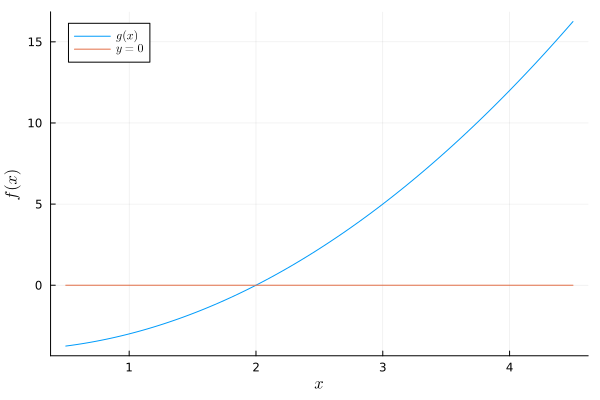

In [41]:
xx = LinRange(0.5, 4.5, 100);
plot(xx, f.(xx), label = L"g(x)")
plot!(xx, repeat([0.0], length(xx)), label = L"y = 0")
xlabel!(L"x")
ylabel!(L"f(x)")

In [42]:
bisect_method(f, a, b, 10^-2, 100);

Iteration 1: Root approximation is x=0.55 with error 2.45.
Iteration 2: Root approximation is x=1.775 with error 1.225.
Iteration 3: Root approximation is x=2.3875 with error 0.6125.
Iteration 4: Root approximation is x=2.08125 with error 0.30625.
Iteration 5: Root approximation is x=1.92812 with error 0.153125.
Iteration 6: Root approximation is x=2.00469 with error 0.0765625.
Iteration 7: Root approximation is x=1.96641 with error 0.0382812.
Iteration 8: Root found at x=1.98555. With error 0.00957031.


## Fixed Point Iteration

Next, we will code up a function that finds the fixed point of a function $g(x)$ on a given interval $[a,b], i.e we will be looking for the $x$ value that satisfies $g(x) = x$. This algoirthm has one major requirement:

1) $|g(x)| < 1$ for all $x \in [a,b]$

If this does not hold, the algorithm will not converge to a fixed point (this is because of the Contraction Mapping Theorem for those who know that).

Now lets code up a fixed point iteration method function. This function is based on Algorithm 2.2 on pg.59-60 in Burden:

In [43]:
function fixed_point_iteration(g, p, n_max, rel_tol)
    p_old = p; # initialize p_old.
    for i in 1:n_max
        p = g(p); # set our new p to g(p)
        @printf("Iteration %d: p = %g\n", i, p);
        if (i > 1) # only do this loop after the first iteration
            if abs(p_old - p)/abs(p) < rel_tol # check to see if error is within rel tol
                break; # if it is, break the loop
            end
        end
        p_old = p # set old_p as p that we just calculated.
    end

    return p
end

fixed_point_iteration (generic function with 1 method)

### Example:

Find a fixed point of

$$g(x) = 2\sin(x)$$

in the interval $[0, \pi]$.

In [44]:
g(x) = 2 * sin(x);

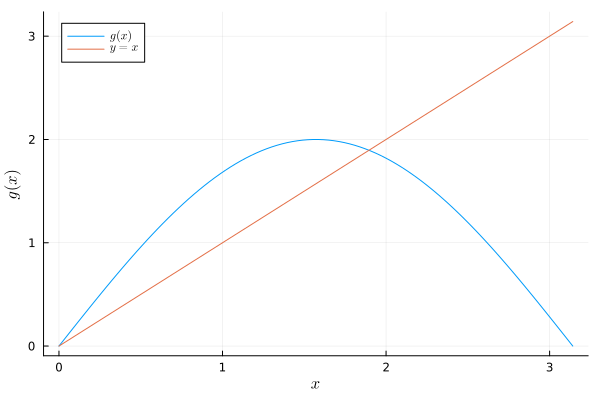

In [45]:
xx = LinRange(0, π, 100);
plot(xx, g.(xx), label = L"g(x)")
plot!(xx, xx, label = L"y=x")
xlabel!(L"x")
ylabel!(L"g(x)")

In [49]:
n_max = 100;
rel_tol = 1e-15;

p0 = 2;

p = fixed_point_iteration(g, p0, n_max, rel_tol);

Iteration 1: p = 1.81859
Iteration 2: p = 1.93891
Iteration 3: p = 1.86602
Iteration 4: p = 1.91348
Iteration 5: p = 1.88371
Iteration 6: p = 1.90288
Iteration 7: p = 1.89073
Iteration 8: p = 1.89851
Iteration 9: p = 1.89356
Iteration 10: p = 1.89672
Iteration 11: p = 1.89471
Iteration 12: p = 1.896
Iteration 13: p = 1.89517
Iteration 14: p = 1.8957
Iteration 15: p = 1.89536
Iteration 16: p = 1.89558
Iteration 17: p = 1.89544
Iteration 18: p = 1.89553
Iteration 19: p = 1.89547
Iteration 20: p = 1.89551
Iteration 21: p = 1.89549
Iteration 22: p = 1.8955
Iteration 23: p = 1.89549
Iteration 24: p = 1.8955
Iteration 25: p = 1.89549
Iteration 26: p = 1.8955
Iteration 27: p = 1.89549
Iteration 28: p = 1.89549
Iteration 29: p = 1.89549
Iteration 30: p = 1.89549
Iteration 31: p = 1.89549
Iteration 32: p = 1.89549
Iteration 33: p = 1.89549
Iteration 34: p = 1.89549
Iteration 35: p = 1.89549
Iteration 36: p = 1.89549
Iteration 37: p = 1.89549
Iteration 38: p = 1.89549
Iteration 39: p = 1.89549
I

### Example

This will not converge:

$$ g(x) = x - x^3 - 4x^2 + 10; $$

Try to find a fixed point in $[1,2]$.

In [52]:
g(x) = x - x^3 - 4x^2 + 10

g (generic function with 1 method)

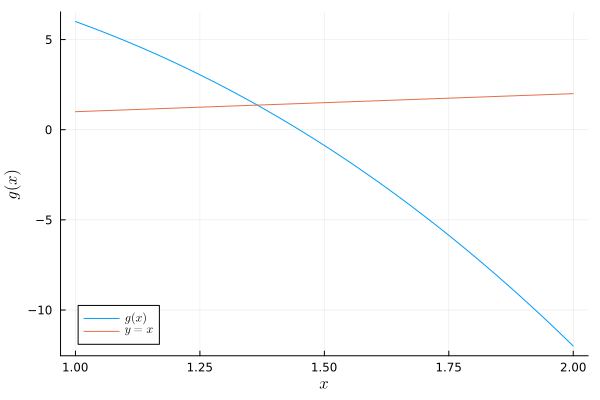

In [53]:
xx = LinRange(1, 2, 100);
plot(xx, g.(xx), label = L"g(x)")
plot!(xx, xx, label = L"y=x")
xlabel!(L"x")
ylabel!(L"g(x)")

In [55]:
n_max = 100;
rel_tol = 1e-3;

p0 = 1.35;

p = fixed_point_iteration(g, p0, n_max, rel_tol);

Iteration 1: p = 1.59962
Iteration 2: p = -2.7287
Iteration 3: p = -2.19455
Iteration 4: p = -0.88968
Iteration 5: p = 6.64841
Iteration 6: p = -454.025
Iteration 7: p = 9.2767e+07
Iteration 8: p = -7.98328e+23
Iteration 9: p = 5.08796e+71
Iteration 10: p = -1.31714e+215
Iteration 11: p = NaN
Iteration 12: p = NaN
Iteration 13: p = NaN
Iteration 14: p = NaN
Iteration 15: p = NaN
Iteration 16: p = NaN
Iteration 17: p = NaN
Iteration 18: p = NaN
Iteration 19: p = NaN
Iteration 20: p = NaN
Iteration 21: p = NaN
Iteration 22: p = NaN
Iteration 23: p = NaN
Iteration 24: p = NaN
Iteration 25: p = NaN
Iteration 26: p = NaN
Iteration 27: p = NaN
Iteration 28: p = NaN
Iteration 29: p = NaN
Iteration 30: p = NaN
Iteration 31: p = NaN
Iteration 32: p = NaN
Iteration 33: p = NaN
Iteration 34: p = NaN
Iteration 35: p = NaN
Iteration 36: p = NaN
Iteration 37: p = NaN
Iteration 38: p = NaN
Iteration 39: p = NaN
Iteration 40: p = NaN
Iteration 41: p = NaN
Iteration 42: p = NaN
Iteration 43: p = NaN
It